# Demo 19: 分子动力学模拟 (Molecular Dynamics Simulation)

## 本教程的目标

在本教程中，我们将学习分子动力学 (Molecular Dynamics, MD) 模拟在药物设计 (drug design) 中的重要性，以及执行蛋白质-配体复合物 (protein-ligand complex) 的 MD 模拟所需的步骤。激酶 EGFR 将作为模拟的示例系统 (sample system)。

### _理论 (Theory)_ 部分内容

- 分子动力学 (Molecular Dynamics)
- 力场 (Force Fields)
- 边界条件 (Boundary Conditions)
- MD 模拟与药物设计 (MD Simulations and Drug Design)
- EGFR 激酶 (EGFR Kinase)

### _实践 (Practical)_ 部分内容

- 在 Google Colab 上安装 (Installation on Google Colab)
- 调整 Linux 或 MacOS 本地安装环境 (Adjust environment for local installations running on Linux or MacOS)
- 导入依赖项 (Import dependencies)
- 下载 PDB 文件 (Download PDB file)
- 准备蛋白质-配体复合物 (Prepare the protein ligand complex)
  - 蛋白质准备 (Protein preparation)
  - 配体准备 (Ligand preparation)
  - 合并蛋白质与配体 (Merge protein and ligand)
- MD 模拟设置 (MD simulation set up)
  - 力场 (Force field)
  - 系统 (System)
- 执行 MD 模拟 (Perform the MD simulation)
- 下载结果 (Download results)

### 参考文献

- Review on the impact of MD simulations in drug discovery ([_J Med Chem_ (2016), **59**(9), 4035‐4061](https://doi.org/10.1021/acs.jmedchem.5b01684))
- Review on the physics behind MD simulations and best practices ([_Living J Comp Mol Sci_ (2019), **1**(1), 5957](https://doi.org/10.33011/livecoms.1.1.5957))
- Review on force fields ([_J Chem Inf Model_ (2018), **58**(3), 565-578](https://doi.org/10.1021/acs.jcim.8b00042))
- Review on EGFR in cancer ([_Cancers (Basel)_ (2017), **9**(5), 52](https://dx.doi.org/10.3390%2Fcancers9050052))
- Summarized statistical knowledge from Pierre-Simon Laplace ([Théorie Analytique des Probabilités _Gauthier-Villars_ (1820), **3**)](https://archive.org/details/uvrescompltesde31fragoog/page/n15/mode/2up)
- Inspired by a notebook form Jaime Rodríguez-Guerra ([github](https://github.com/jaimergp/uab-msc-bioinf/blob/master/MD%20Simulation%20and%20Analysis%20in%20a%20Notebook.ipynb))
- Repositories of [OpenMM](https://github.com/openmm/openmm) and [OpenMM Forcefields](https://github.com/openmm/openmmforcefields), [RDKit](https://github.com/rdkit/rdkit), [PyPDB](https://github.com/williamgilpin/pypdb), [MDTraj](https://github.com/mdtraj/mdtraj), [PDBFixer](https://github.com/openmm/pdbfixer)
- Wikipedia articles about [MD simulations](https://en.wikipedia.org/wiki/Molecular_dynamics), [AMBER](https://en.wikipedia.org/wiki/AMBER) and [force fields](<https://en.wikipedia.org/wiki/Force_field_(chemistry)>) in general


## 理论 (Theory)

### 分子动力学 (Molecular Dynamics)

分子动力学 (Molecular Dynamics) 是一种计算方法，用于分析给定系统 (defined system) 中原子和分子的运动和相互作用。该方法源于理论物理学 (theoretical physics)，于 20 世纪 50 年代发展起来 (Alder and Wainwright in [_J Chem Phys_ (1959), **31**(2), 459](https://doi.org/10.1063/1.1730376))，尽管其背后的思想可以追溯到更早：

> An intelligence which could, at any moment, comprehend all the forces by which nature is animated and the respective positions of the beings of which it is composed, and moreover, if this intelligence were far-reaching enough to subject these data to analysis, it would encompass in that formula both the movements of the largest bodies in the universe and those of the lightest atom: to it nothing would be uncertain, and the future, as well as the past, would be present to its eyes. The human mind offers us, in the perfection which it has given to astronomy, a faint sketch of this intelligence. (Pierre-Simon Laplace, 1820)

让我们将拉普拉斯 (Laplace) 的这一论述视为分子动力学模拟 (molecular dynamics simulations) 的思想基础。换句话说，我们可以通过了解物理系统 (physical system) 组成部分的特性并应用牛顿运动定律 (Newton's laws of motion) 来近似其行为。通过求解运动方程 (equations of motion)，我们可以获得系统的分子轨迹 (molecular trajectory)，这是一系列包含所有粒子位置、速度以及其势能 (potential energy) 的快照。为此，我们定义了称为力场 (force fields) 的函数，它们提供了系统中施加在每个粒子上的所有力的近似描述。然后，我们使用数值积分器 (numerical integrators) 来求解系统的初值问题 (initial value problem) 并获得轨迹。正如听起来那样，这个过程需要相当大的处理能力，直到几年前，MD 才开始得到更广泛的应用，特别是在计算化学 (computational chemistry) 和生物学 (biology) 领域，以及药物发现 (drug discovery) 中 ([_J Med Chem_ (2016), **59**(9), 4035‐4061](https://doi.org/10.1021/acs.jmedchem.5b01684))。

![MD_rotor_250K_1ns.gif](https://github.com/volkamerlab/teachopencadd/raw/d1ded86bb2c82ef088cc5145d0bcb997f6eab7dd/teachopencadd/talktorials/018_md_simulation/images/MD_rotor_250K_1ns.gif)

**图 1**：由三个分子组成的超分子 (supramolecule) 在受限纳米孔 (nanoscopic pore) 中旋转的分子动力学模拟 (Palma et al. via [Wikimedia](https://commons.wikimedia.org/w/index.php?curid=34866205))。

### 力场 (Force fields)

力场 (Force fields) 描述了分子内部以及分子间原子之间的力。它们是参数方程 (parametric equations)，包含不同力（键伸缩 (bond stretching)、范德华力 (van-der-Waals) 等）的分量。参数值 (parameter values) 通常通过实验获得，并根据所涉及的分子和模拟设置 (simulation settings) 在每个 MD 场景中发生变化。结果是对系统能量景观 (energy landscape) 的数学描述，其中作用在每个粒子上的力是势能 (potential energy) 对原子坐标 (coordinates of the atoms) 的梯度 (gradient) 产生的。

$$V(r^N) = \sum_{i \in  bonds}k_{bi} (l_i-l^0_i)^2 + \sum_{i \in  angles}k_{ai}(\theta_i - \theta^0_i)^2 + \sum_{i\in torsions} \sum_n \frac{1}{2} V_i^n[1+cos(nw_i-\gamma_i)]$$
$$+ \sum_{j=1}^{N-1}\sum_{I=j+1}^{N} f_{ij}\in ij [(\frac{r^0_{ij}}{r_{ij}})^{12}-2(\frac{r^0_{ij}}{r_{ij}})^{6}]+\frac{q_iq_j}{4\pi \in_0 r_{ij}}$$

该公式由不同分量的和组成。前三个分量包含有关键长 (bond lengths)、键角 (angles) 和扭转角 (torsions)（分子内力 (intramolecular forces)）的信息。最后一个分量描述了分子间非键合力 (intermolecular, non-bonded forces)，如范德华力 (van-der-Waals forces) 和静电相互作用 (electrostatic interactions)。各种参数，用上标 0 表示，取决于所使用的力场，并在 AMBER 力场家族的所有成员之间有所不同。请注意，这些力场假设固定电荷粒子 (fixed-charge particles)，不允许极化 (polarization)，也不考虑局部电荷如何影响其周围环境。

以下力场分量的可视化表示以更直观的方式展示了相同的概念。

![MM_PEF.png](https://github.com/volkamerlab/teachopencadd/raw/d1ded86bb2c82ef088cc5145d0bcb997f6eab7dd/teachopencadd/talktorials/018_md_simulation/images/MM_PEF.png)

**图 2**：分子力学力场 (molecular mechanics force field) 的组成部分 (Edboas via [Wikimedia](https://commons.wikimedia.org/w/index.php?curid=4194424))。

### 边界条件 (Boundary conditions)

通常，分子系统在充满溶剂（如水）的盒子中进行模拟。这些盒子是有限大小的，这导致盒子边界处或附近的分子出现问题。它们应该与哪些分子相互作用？周期性边界条件 (Periodic boundary conditions) 可以通过模拟一个理论上无限的系统来避免此类边界伪影 (boundary artifacts)。盒子一个边界处的分子因此与盒子另一侧边界处的分子相互作用。这模拟了一种情况，即模拟盒子被其自身的复制品包围。在可视化此类 MD 模拟时，人们通常可以观察到粒子从盒子的一侧离开（图 3）。然而，它们同时以相同的速度重新出现在盒子的另一侧。对于周期性边界条件下的模拟，建议使用足够大的模拟盒子，以便模拟的大分子 (macromolecule) 不会与其自身的相邻图像接触。

![MD_water.gif](https://github.com/volkamerlab/teachopencadd/raw/d1ded86bb2c82ef088cc5145d0bcb997f6eab7dd/teachopencadd/talktorials/018_md_simulation/images/MD_water.gif)

**图 3**：水分子在周期性边界条件下的分子动力学模拟 (Kmckiern via [Wikimedia](https://commons.wikimedia.org/wiki/File:MD_water.gif))。

### MD 模拟与药物设计 (MD simulations and drug design)

MD 模拟为配体 (ligand) 与其靶点 (target) 结合的高度动态过程提供了宝贵的见解。当配体（或药物）在溶液中接近大分子（蛋白质）时，它会遇到一个不断运动的结构。此外，配体可能会诱导大分子发生构象变化 (conformational changes)，从而更好地适应小分子。这些构象可能无法通过静态方法发现。因此，在静态无配体结构中未观察到但可以通过 MD 模拟发现的结合位点 (binding sites) 有时被称为 _隐秘结合位点 (cryptic binding sites)_ ([_J Med Chem_ (2016), **59**(9), 4035‐4061](https://doi.org/10.1021/acs.jmedchem.5b01684))。通过 MD 模拟识别此类结合位点可以启动新的药物发现活动 (drug discovery campaigns)。在药物发现过程的后期，MD 模拟还可以用于评估计算识别的小分子 (computationally identified small molecules) 的质量，然后再进行更昂贵和耗时的 _体外 (in vitro)_ 测试。总而言之，MD 模拟在计算药物设计 (computational drug design) 中是一个宝贵的资产。

### EGFR 激酶 (EGFR kinase)

**表皮生长因子受体 (E**pidermal **G**rowth **F**actor **R**eceptor, EGFR) 是一种重要的药物靶点 (drug target)，与癌症 (cancer) 和炎症 (inflammation) 有关 ([Wikipedia](https://en.wikipedia.org/wiki/Epidermal_growth_factor_receptor))。它是一种跨膜蛋白 (transmembrane protein)，具有细胞外受体结构域 (extracellular receptor domain) 和细胞内激酶结构域 (intracellular kinase domain)。内源性配体 (endogenous ligand) 表皮生长因子 (epidermal growth factor) 的结合通过二聚化 (dimerization) 和自磷酸化 (autophosphorylation) 导致激酶结构域的激活。激活的激酶结构域随后可以磷酸化下游信号蛋白 (downstream signaling proteins)，从而触发 DNA 合成 (DNA synthesis) 和细胞增殖 (cell proliferation) ([_Cancers (Basel)_ (2017), **9**(5), 52](https://dx.doi.org/10.3390%2Fcancers9050052))。抑制这种激酶是几种已批准的抗癌药物 (cancer drugs) 的作用机制 (mechanism of action) ([DrugBank](https://go.drugbank.com/bio_entities/BE0000767))。在本教程中，我们使用该激酶的 PDB 结构 **3POZ**，它与小分子抑制剂 (small molecule inhibitor) **03P** 形成复合物，以执行 MD 模拟 ([PDB: 3POZ](https://www.rcsb.org/structure/3poz))。

![3poz_assembly-1.jpeg](https://github.com/volkamerlab/teachopencadd/raw/ed3b2b6b655589d71355295af4c89363a63558b9/teachopencadd/talktorials/018_md_simulation/images/3poz_assembly-1.jpeg)

**图 4**：EGFR 激酶结构域 (EGFR kinase domain) 与抑制剂 03P 结合的结构 3POZ ([PDB: 3POZ](https://www.rcsb.org/structure/3poz))。


## 实践 (Practical)

我们现在将使用分子动力学引擎 (molecular dynamics engine) [OpenMM](https://github.com/openmm/openmm) 进行 MD 模拟 (MD simulation)，OpenMM 是一个用于分子模拟 (molecular simulation) 的高性能工具包。它是开源的，可以作为应用程序 (application) 或库 (library) 使用。我们将把它作为 Python 库 (Python library) 使用。

### 在 Google Colab 上安装 (Installation on Google Colab)

如果您正在 [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb) 上工作，以下代码单元 (code cells) 将安装所有必需的软件包 (packages)。安装 [condacolab](https://github.com/jaimergp/condacolab) 软件包将重启内核，这是预期行为。本juperlab notebook也可以在本地计算机上使用，但需要相当大的计算能力。


In [ ]:
try:
    import google.colab

    !pip install condacolab
    import condacolab

    condacolab.install()
except ModuleNotFoundError:
    pass

In [ ]:
try:
    import condacolab
    from google.colab import files
    from IPython.display import clear_output

    condacolab.check()
    !conda install -q -y -c conda-forge mdtraj openmm openmmforcefields openff-toolkit pdbfixer pypdb rdkit
except ModuleNotFoundError:
    on_colab = False
else:
    # check if installation was succesful
    try:
        import rdkit

        on_colab = True
        clear_output()  # clear the excessive installation outputs
        print("Dependencies successfully installed!")
    except ModuleNotFoundError:
        print("Error while installing dependencies!")

### 调整 Linux 或 MacOS 本地安装环境 (Adjust environment for local installations running on Linux or MacOS)

In [ ]:
import sys

if not on_colab and sys.platform.startswith(("linux", "darwin")):
    !mamba install -q -y -c conda-forge openmmforcefields
    # Notes:
    # - If you do not have mamba installed, install it or use conda instead
    # - Under MacOS with an M1 chip you may need to use
    #   CONDA_SUBDIR=osx-64 in front of the above command

### 加载依赖库

In [ ]:
import copy
from pathlib import Path

import requests
from IPython.display import display
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import mdtraj as md
import pdbfixer
import openmm as mm
import openmm.app as app
from openmm import unit
from openff.toolkit.topology import Molecule, Topology
from openmmforcefields.generators import GAFFTemplateGenerator

In [ ]:
# create data directory if not exists
HERE = Path(_dh[-1])
DATA = HERE / "data"
DATA.mkdir(exist_ok=True)

### 下载 PDB 文件 (Download PDB Files)

蛋白质数据库 ([Protein Data Bank, PDB](https://www.rcsb.org/)) 允许通过 URL 轻松下载文件。


In [ ]:
pdbid = "3POZ"
ligand_name = "03P"
pdb_path = DATA / f"{pdbid}.pdb"
pdb_url = f"https://files.rcsb.org/download/{pdbid}.pdb"

In [ ]:
r = requests.get(pdb_url)
r.raise_for_status()
with open(pdb_path, "wb") as f:
    f.write(r.content)

### 准备蛋白质和配体

#### 蛋白质准备 (Protein preparation)

对于成功的模拟 (simulation) 而言，一个正确且完整的体系至关重要。从蛋白质数据库 (Protein Data Bank) 中获取的晶体结构 (Crystallographic structures) 通常会缺失原子 (atoms)，主要是氢原子 (hydrogens)，并且可能包含非标准残基 (non-standard residues)。在本教程中，我们将使用 Python 包 (Python package) [PDBFixer](https://github.com/openmm/pdbfixer) 来准备蛋白质结构 (protein structure)。然而，[PDBFixer](https://github.com/openmm/pdbfixer) 对共结晶配体 (co-crystallized ligands) 的处理效果不佳，因此它们将单独进行准备 (prepared separately)。


In [ ]:
def prepare_protein(
    pdb_file, ignore_missing_residues=True, ignore_terminal_missing_residues=True, ph=7.0
):
    """
    Use pdbfixer to prepare the protein from a PDB file. Hetero atoms such as ligands are
    removed and non-standard residues replaced. Missing atoms to existing residues are added.
    Missing residues are ignored by default, but can be included.

    Parameters
    ----------
    pdb_file: pathlib.Path or str
        PDB file containing the system to simulate.
    ignore_missing_residues: bool, optional
        If missing residues should be ignored or built.
    ignore_terminal_missing_residues: bool, optional
        If missing residues at the beginning and the end of a chain should be ignored or built.
    ph: float, optional
        pH value used to determine protonation state of residues

    Returns
    -------
    fixer: pdbfixer.pdbfixer.PDBFixer
        Prepared protein system.
    """
    fixer = pdbfixer.PDBFixer(str(pdb_file))
    fixer.removeHeterogens()  # co-crystallized ligands are unknown to PDBFixer
    fixer.findMissingResidues()  # identify missing residues, needed for identification of missing atoms

    # if missing terminal residues shall be ignored, remove them from the dictionary
    if ignore_terminal_missing_residues:
        chains = list(fixer.topology.chains())
        keys = fixer.missingResidues.keys()
        for key in list(keys):
            chain = chains[key[0]]
            if key[1] == 0 or key[1] == len(list(chain.residues())):
                del fixer.missingResidues[key]

    # if all missing residues shall be ignored ignored, clear the dictionary
    if ignore_missing_residues:
        fixer.missingResidues = {}

    fixer.findNonstandardResidues()  # find non-standard residue
    fixer.replaceNonstandardResidues()  # replace non-standard residues with standard one
    fixer.findMissingAtoms()  # find missing heavy atoms
    fixer.addMissingAtoms()  # add missing atoms and residues
    fixer.addMissingHydrogens(ph)  # add missing hydrogens
    return fixer

In [ ]:
# prepare protein and build only missing non-terminal residues
prepared_protein = prepare_protein(pdb_path, ignore_missing_residues=False)

#### 准备配体

在完成蛋白质准备后，我们将注意力转向配体(ligand)。同样地，我们需要添加氢原子(hydrogens)，同时需要确保键级(bond orders)被正确指定，因为某些PDB条目(PDB entries)可能包含错误。我们使用Python包(Python package) [RDKit](https://github.com/rdkit/rdkit)，这是一个开源的化学信息学库(cheminformatics library)。

我们将通过SMILES字符串(SMILES string)向[RDKit](https://github.com/rdkit/rdkit)提供正确的质子化状态(protonation state)和键级(bond orders)。每个共结晶配体(co-crystallized ligand)的中性异构SMILES字符串(isomeric SMILES strings)可以在其对应的PDB条目(PDB entry)中找到。PDB条目[3POZ](https://www.rcsb.org/structure/3poz)的配体名称为[03P](https://www.rcsb.org/ligand/03P)。如果配体可能以其带电形式(charged form)或特定互变异构体(tautomer)形式结合，这些特征需要被纳入SMILES字符串中。


In [ ]:
def prepare_ligand(pdb_file, resname, smiles, depict=True):
    """
    Prepare a ligand from a PDB file via adding hydrogens and assigning bond orders. A depiction
    of the ligand before and after preparation is rendered in 2D to allow an inspection of the
    results. Huge thanks to @j-wags for the suggestion.

    Parameters
    ----------
    pdb_file: pathlib.PosixPath
       PDB file containing the ligand of interest.
    resname: str
        Three character residue name of the ligand.
    smiles : str
        SMILES string of the ligand informing about correct protonation and bond orders.
    depict: bool, optional
        show a 2D representation of the ligand

    Returns
    -------
    prepared_ligand: rdkit.Chem.rdchem.Mol
        Prepared ligand.
    """
    # split molecule
    rdkit_mol = Chem.MolFromPDBFile(str(pdb_file))
    rdkit_mol_split = Chem.rdmolops.SplitMolByPDBResidues(rdkit_mol)

    # extract the ligand and remove any already present hydrogens
    ligand = rdkit_mol_split[resname]
    ligand = Chem.RemoveHs(ligand)

    # assign bond orders from template
    reference_mol = Chem.MolFromSmiles(smiles)
    prepared_ligand = AllChem.AssignBondOrdersFromTemplate(reference_mol, ligand)
    prepared_ligand.AddConformer(ligand.GetConformer(0))

    # protonate ligand
    prepared_ligand = Chem.rdmolops.AddHs(prepared_ligand, addCoords=True)
    prepared_ligand = Chem.MolFromMolBlock(Chem.MolToMolBlock(prepared_ligand))

    # 2D depiction
    if depict:
        ligand_2d = copy.deepcopy(ligand)
        prepared_ligand_2d = copy.deepcopy(prepared_ligand)
        AllChem.Compute2DCoords(ligand_2d)
        AllChem.Compute2DCoords(prepared_ligand_2d)
        display(
            Draw.MolsToGridImage(
                [ligand_2d, prepared_ligand_2d], molsPerRow=2, legends=["original", "prepared"]
            )
        )

    # return ligand
    return prepared_ligand

使用从PDB条目(PDB entry)中获取的[03P](https://www.rcsb.org/ligand/03P)异构SMILES字符串(isomeric SMILES string)调用此函数，将返回一个正确准备的配体(ligand)。打印出原始配体和准备后配体的二维结构图(2D-representation)以供检查。


In [ ]:
smiles = "CC(C)(O)CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(c4)C(F)(F)F)c(Cl)c3)c12"
rdkit_ligand = prepare_ligand(pdb_path, ligand_name, smiles)

#### 蛋白质与配体合并 (Merge protein and ligand)

在下一步中，我们将使用Python包(Python package) [MDTraj](https://github.com/mdtraj/mdtraj)合并准备好的蛋白质和配体结构(protein and ligand structures)。[MDTraj](https://github.com/mdtraj/mdtraj)可以处理当前作为[PDBFixer](https://github.com/openmm/pdbfixer)分子(molecule)的蛋白质，这种格式具有与[OpenMM建模器](http://docs.openmm.org/latest/userguide/application.html#model-building-and-editing)的拓扑结构(topology)和原子位置(atom positions)相似且通常可互换的拓扑结构和原子位置。然而对于配体，我们需要进行多次转换，因为它目前是一个[RDKit](https://github.com/rdkit/rdkit)分子。


In [ ]:
def rdkit_to_openmm(rdkit_mol, name="LIG"):
    """
    Convert an RDKit molecule to an OpenMM molecule.
    Inspired by @hannahbrucemcdonald and @glass-w.

    Parameters
    ----------
    rdkit_mol: rdkit.Chem.rdchem.Mol
        RDKit molecule to convert.
    name: str
        Molecule name.

    Returns
    -------
    omm_molecule: openmm.app.Modeller
        OpenMM modeller object holding the molecule of interest.
    """
    # convert RDKit to OpenFF
    off_mol = Molecule.from_rdkit(rdkit_mol)

    # add name for molecule
    off_mol.name = name

    # add names for atoms
    element_counter_dict = {}
    for off_atom, rdkit_atom in zip(off_mol.atoms, rdkit_mol.GetAtoms()):
        element = rdkit_atom.GetSymbol()
        if element in element_counter_dict.keys():
            element_counter_dict[element] += 1
        else:
            element_counter_dict[element] = 1
        off_atom.name = element + str(element_counter_dict[element])

    # convert from OpenFF to OpenMM
    off_mol_topology = off_mol.to_topology()
    mol_topology = off_mol_topology.to_openmm()
    mol_positions = off_mol.conformers[0]

    # convert units from Ångström to nanometers
    # since OpenMM works in nm
    mol_positions = mol_positions.to("nanometers")

    # combine topology and positions in modeller object
    omm_mol = app.Modeller(mol_topology, mol_positions)

    return omm_mol

In [ ]:
omm_ligand = rdkit_to_openmm(rdkit_ligand, ligand_name)

现在蛋白质和配体都已转换为[OpenMM](https://github.com/openmm/openmm)兼容格式，可以使用[MDTraj](https://github.com/mdtraj/mdtraj)进行合并。


In [ ]:
def merge_protein_and_ligand(protein, ligand):
    """
    Merge two OpenMM objects.

    Parameters
    ----------
    protein: pdbfixer.pdbfixer.PDBFixer
        Protein to merge.
    ligand: openmm.app.Modeller
        Ligand to merge.

    Returns
    -------
    complex_topology: openmm.app.topology.Topology
        The merged topology.
    complex_positions: openmm.unit.quantity.Quantity
        The merged positions.
    """
    # combine topologies
    md_protein_topology = md.Topology.from_openmm(protein.topology)  # using mdtraj for protein top
    md_ligand_topology = md.Topology.from_openmm(ligand.topology)  # using mdtraj for ligand top
    md_complex_topology = md_protein_topology.join(md_ligand_topology)  # add them together
    complex_topology = md_complex_topology.to_openmm()

    # combine positions
    total_atoms = len(protein.positions) + len(ligand.positions)

    # create an array for storing all atom positions as tupels containing a value and a unit
    # called OpenMM Quantities
    complex_positions = unit.Quantity(np.zeros([total_atoms, 3]), unit=unit.nanometers)
    complex_positions[: len(protein.positions)] = protein.positions  # add protein positions
    complex_positions[len(protein.positions) :] = ligand.positions  # add ligand positions

    return complex_topology, complex_positions

In [ ]:
complex_topology, complex_positions = merge_protein_and_ligand(prepared_protein, omm_ligand)

In [ ]:
print("Complex topology has", complex_topology.getNumAtoms(), "atoms.")
# NBVAL_CHECK_OUTPUT

### 分子动力学模拟设置 (MD simulation set up)

现在我们可以使用准备好的复合物来设置分子动力学模拟(MD simulation)。

#### 力场 (Force field)

常见的力场(force field)如AMBER包含氨基酸、核酸、水和离子的参数，通常根据研究目的提供多种选择。我们使用`amber14-all.xml`力场文件，该文件随OpenMM一起提供，包含蛋白质、DNA、RNA和脂质的参数。对于溶剂化，我们使用标准的三位点[水模型](https://en.wikipedia.org/wiki/Water_model)[**TIP3P**](https://aip.scitation.org/doi/10.1063/1.445869)。

然而，配体的参数并不包含在内。为了生成这些参数，我们可以使用通用AMBER力场(General AMBER ForceField, [GAFF](http://ambermd.org/antechamber/gaff.html))，该力场已在Python包[OpenMM Forcefields](https://github.com/openmm/openmmforcefields)中实现。以下函数生成一个包含标准AMBER参数的力场对象，如果需要还可以额外包含小分子的参数。

In [ ]:
def generate_forcefield(
    rdkit_mol=None, protein_ff="amber14-all.xml", solvent_ff="amber14/tip3pfb.xml"
):
    """
    Generate an OpenMM Forcefield object and register a small molecule.

    Parameters
    ----------
    rdkit_mol: rdkit.Chem.rdchem.Mol
        Small molecule to register in the force field.
    protein_ff: string
        Name of the force field.
    solvent_ff: string
        Name of the solvent force field.

    Returns
    -------
    forcefield: openmm.app.Forcefield
        Forcefield with registered small molecule.
    """
    forcefield = app.ForceField(protein_ff, solvent_ff)

    if rdkit_mol is not None:
        gaff = GAFFTemplateGenerator(
            molecules=Molecule.from_rdkit(rdkit_mol, allow_undefined_stereo=True)
        )
        forcefield.registerTemplateGenerator(gaff.generator)

    return forcefield

In [ ]:
forcefield = generate_forcefield(rdkit_ligand)

#### 体系构建 (System)

使用我们配置好的力场，现在可以利用[OpenMM建模器](http://docs.openmm.org/latest/userguide/application.html#model-building-and-editing)类来创建分子动力学(MD)环境，即一个包含复合物并被溶剂填充的模拟盒子(simulation box)。标准溶剂是含有特定离子浓度的水溶液。盒子的大小可以通过多种方式确定。我们采用填充距离(padding)的方式定义，这将产生一个立方体盒子，其尺寸取决于复合物的最大维度。

> 注意：此步骤可能耗时较长，根据硬件配置可能需要数分钟时间。


In [ ]:
modeller = app.Modeller(complex_topology, complex_positions)
modeller.addSolvent(forcefield, padding=1.0 * unit.nanometers, ionicStrength=0.15 * unit.molar)

使用我们溶剂化的体系和力场，最终可以创建一个[OpenMM System](http://docs.openmm.org/development/api-python/generated/openmm.openmm.System.html#openmm.openmm.System)并设置模拟参数。

除了体系外，模拟还需要一个积分器(integrator)。[OpenMM Integrator](http://docs.openmm.org/development/api-python/library.html#integrators)定义了通过积分运动方程来模拟体系的方法。我们选择的**Langevin积分器**使用Langevin方程。所有不同类型的积分器列表可以在[OpenMM文档](http://docs.openmm.org/development/api-python/library.html#integrators)中找到。如需深入了解**Langevin积分器**，我们推荐阅读关于Langevin方程的资料，例如[维基百科](https://en.wikipedia.org/wiki/Langevin_equation)上的介绍。


In [ ]:
system = forcefield.createSystem(modeller.topology, nonbondedMethod=app.PME)
integrator = mm.LangevinIntegrator(
    300 * unit.kelvin, 1.0 / unit.picoseconds, 2.0 * unit.femtoseconds
)
simulation = app.Simulation(modeller.topology, system, integrator)
simulation.context.setPositions(modeller.positions)

### 执行分子动力学模拟 (Perform the MD simulation)

现在所有设置已完成，我们可以开始执行模拟。我们需要设置初始位置并对体系进行能量最小化(energy minimization)以获得低能量的初始构型(starting configuration)，这对于减少因严重原子碰撞(atom clashes)导致的模拟失败非常重要。能量最小化后的体系将被保存。


In [ ]:
simulation.minimizeEnergy()
with open(DATA / "topology.pdb", "w") as pdb_file:
    app.PDBFile.writeFile(
        simulation.topology,
        simulation.context.getState(getPositions=True, enforcePeriodicBox=True).getPositions(),
        file=pdb_file,
        keepIds=True,
    )

### 分子动力学模拟执行

完成能量最小化后，即可开始分子动力学(MD)模拟。本教程将进行一个简短的演示性模拟。实际科研用途的模拟通常需要数纳秒(nanoseconds)甚至微秒(microseconds)级别的时间尺度。我们仅模拟100皮秒(ps)的分子动力学过程，对应5万步、每步2飞秒(fs)的模拟。每10皮秒(5000步)保存一次分子"快照"(snapshots)，共获得10帧数据。结果保存在.xtc文件中，该文件包含特定时间点所有原子的坐标信息。结合之前保存的能量最小化体系的PDB文件，即可获得后续分析所需的全部数据。

**注意**：本教程在不使用Google Colab的情况下仅生成20飞秒的轨迹。若您拥有高性能GPU，可适当延长模拟时间。

In [ ]:
# output settings
if on_colab:
    steps = 50000  # corresponds to 100 ps
    write_interval = 5000  # write every 10 ps
    log_interval = 2500  # log progress to stdout every 5 ps
else:
    steps = 10  # corresponds to 20 fs
    write_interval = 1  # write every 2 fs
    log_interval = 1  # log progress to stdout every 2 fs
simulation.reporters.append(
    md.reporters.XTCReporter(file=str(DATA / "trajectory.xtc"), reportInterval=write_interval)
)
simulation.reporters.append(
    app.StateDataReporter(
        sys.stdout,
        log_interval,
        step=True,
        potentialEnergy=True,
        temperature=True,
        progress=True,
        remainingTime=True,
        speed=True,
        totalSteps=steps,
        separator="\t",
    )
)

体系中所有粒子的速度(velocities)根据给定温度下的分布随机选取。我们选择300开尔文(Kelvin)，略高于室温。系统会生成一个随机种子(random seed)，但也可以显式指定以确保结果可重复。

随后按照之前定义的步数执行模拟。


In [ ]:
simulation.context.setVelocitiesToTemperature(300 * unit.kelvin)
simulation.step(steps)  # perform the simulation

In [ ]:
# Check the trajectory exists and is not empty
(DATA / "trajectory.xtc").stat().st_size > 0
# NBVAL_CHECK_OUTPUT

### 下载结果 (Download results)

如果您在Google Colab上工作，可以执行以下单元格以下载分子动力学(MD)模拟结果。

In [ ]:
if on_colab:
    files.download(DATA / "topology.pdb")
    files.download(DATA / "trajectory.xtc")

## 讨论 (Discussion)

我们已成功完成了蛋白质-配体复合物(protein-ligand complex)的分子动力学(MD)模拟。但为了缩短教程执行时间，我们仅模拟了较短的时间尺度。要解决药物设计中的关键问题，通常需要更长时间的模拟。

目前 MD 模拟的计算成本仍然较高，难以满足实际需求。因此，开发了所谓的增强采样方法(enhanced sampling methods)来加速构象采样(conformational sampling)。一些最常用的方法将在下面的**延伸阅读**部分讨论。

此外，我们未包含平衡化步骤(equilibration step)，该步骤通常用于在模拟开始前将体系从 0K 缓慢加热至 300K，对于模拟包含脂质双层(lipid bilayers)等更敏感体系可能很重要。配体和蛋白质的质子化(protonation)是分开进行的，这种做法不够理想，因为蛋白质残基和配体的质子化状态会相互影响。但我们尚未找到满足所有要求的免费开源解决方案，欢迎提出建议！

接下来学习如何可视化和分析轨迹(trajectory)

## 测验 (Quiz)

- AMBER力场(force field)考虑了哪些分子间和分子内作用力(inter- and intramolecular forces)？你能想到哪些未被考虑的作用力？
- 使用相同参数运行两次笔记本，你预期会得到完全相同的模拟结果吗？
- 尝试对不含配体的蛋白质进行短期(10ps，每1ps保存一次快照)模拟。你可以在[PDB](https://www.rcsb.org/)上找到各种结构，或者使用EGFR激酶并移除其配体。


## 延伸阅读 (Further reading)

### 增强采样方法 (Enhanced sampling methods)

理论上，无偏分子动力学(MD)模拟应该能够模拟药物分子与其大分子靶标的结合和解离事件。但这些事件的时间尺度通常在毫秒至秒量级。增强采样方法旨在加速构象采样(conformational sampling)([_J Med Chem._ 2016, **59(9)**, 4035-61](https://doi.org/10.1021/acs.jmedchem.5b01684))。

其中一种方法是**自由能微扰(Free energy perturbation, FEP)**(也称为化学自由能计算)，它计算从状态 A 到状态 B 的自由能变化。该方法常用于先导化合物优化(lead optimization)，评估配体微小修饰对靶标结合亲和力的影响。通过模拟多个中间("化学")状态，状态 A 的配体逐渐转变为状态 B 的配体([alchemistry](http://www.alchemistry.org/wiki/Main_Page))。

另一种自由能计算技术是**伞形采样(Umbrella sampling, US)**。US 通过施加能量偏置进行分阶段模拟，强制系统沿集体变量(collective variable, CV)采样。偏置通常采用谐波势形式，因此称为"伞形"。其目标是沿 CV 采样高能区域，但在药物设计中应用受限于高计算成本。

相比之下，**牵引分子动力学(Steered MD, SMD)**采用不同方法：对系统施加外力。这些时间依赖性外力促进配体从靶标解离。SMD 计算系统所受最终作用力，解离力谱可用于筛选对接计算结果，区分活性与非活性分子。


# Demo20 · 分子动力学模拟分析 (Analyzing molecular dynamics simulations)

**注意 (Note):** 本教程 (talktorial) 是 TeachOpenCADD 平台的一部分，该平台旨在教授特定领域技能 (domain-specific skills) 并提供流程模板 (pipeline templates) 作为研究项目的起点 (starting points)。

## 本教程的目标 (Aim of this talktorial)

在本教程中，我们将介绍分子动力学 (Molecular Dynamics, MD) 模拟的分析方法。所介绍的方法包括动画可视化 (animated visualization)、结构比对 (structural alignment)、均方根偏差 (Root-Mean-Square Deviation, RMSD) 计算以及选定原子距离 (selected atom distances) 和氢键分析 (hydrogen bond analysis)。
请注意，我们将使用 **Talktorial T019** 生成的模拟结果（1纳秒 (ns)，100帧 (frames)），该模拟针对与抑制剂 (inhibitor) [03P](https://www.rcsb.org/ligand/03P) 结合的表皮生长因子受体 (EGFR) 激酶 ([PDB: 3POZ](https://www.rcsb.org/structure/3poz))。

### 理论内容 (Contents in _Theory_)

- 分子动力学 (MD) 模拟
  - 在药物发现过程 (drug discovery process) 中的应用
  - 柔性结构 (Flexible structures) 与刚性结构 (static structures)
- 分析分子动力学 (MD) 模拟
  - 可视化 (Visualization)
  - 均方根偏差 (RMSD)
  - 氢键分析 (Hydrogen bond analysis)

### 实践内容 (Contents in _Practical_)

- 加载并可视化系统 (Load and visualize the system)
- 比对 (Alignment)
- 蛋白质 (protein) 和配体 (ligand) 的均方根偏差 (RMSD)
  - 随时间变化的均方根偏差 (RMSD over time)
  - 帧间均方根偏差 (RMSD between frames)
- 相互作用分析 (Interaction analysis)
  - 原子距离 (Atomic distances)
  - 氢键分析 (Hydrogen bond analysis)

### 参考文献

Theoretical Background:

- Review on the impact of MD simulations in drug discovery ([_J Med Chem_ (2016), **59**(9), 4035‐4061](https://doi.org/10.1021/acs.jmedchem.5b01684))
- Review on force fields ([_J Chem Inf Model_ (2018), **58**(3), 565-578](https://doi.org/10.1021/acs.jcim.8b00042))
- Review on hydrogen bonding ([_PLoS One._ (2010), **5(8)**, e12029](https://doi.org/10.1371%2Fjournal.pone.0012029))
- Guide to molecular interactions ([_J. Med. Chem._ 2010, **53(14)**, 5061-84](https://doi.org/10.1021/jm100112j))
- Wikipedia Article about [root-mean-square deviation](https://en.wikipedia.org/wiki/Root-mean-square_deviation)
- Repositories of [MDAnalysis](https://www.mdanalysis.org/) and [NGL View](https://github.com/arose/nglview)


## 理论 (Theory)

### 分子动力学 (MD) 模拟

### 在药物发现过程中的应用 (Application in the drug discovery process)

过去几十年来，基于结构的药物设计 (structure-based drug design) 越来越受到关注。采用GPU的更快算法和架构的发展为分子动力学 (Molecular Dynamics, MD) 模拟成为药物发现过程 (drug discovery process) 中常规应用的计算工具铺平了道路。MD模拟的主要优势之一是能更准确地估计药物-靶标识别和结合过程 (drug-target recognition and binding process)。如今，多种计算方法建立在MD模拟基础上，为设计、选择和优化新候选药物过程中遇到的许多挑战提供了工具 ([_J Med Chem._ 2016, **59(9)**, 4035-61](https://doi.org/10.1021/acs.jmedchem.5b01684))。

有关如何执行蛋白质-配体复合物 (protein-ligand complex) MD模拟的更多细节，请参阅**Talktorial T019**。

### 柔性结构与刚性结构的比较 (Flexible vs. static structures)

蛋白质-配体复合物的静态模型 (static models)，如X射线结构 (X-ray structures)，可以评估先导候选物 (lead candidate) 的结合模式 (binding mode)，这可用于系统地建议合成新型类似物 (analogs) 以提高亲和力 (affinity) 和理化性质 (physiochemical properties)。然而，静态结构不能解释药物-靶标结合的所有现象，因为配体 (ligand)、靶标 (target) 和周围环境 (surroundings)（如溶剂 (solvent) 和/或膜 (membrane)）之间观察到的众多相互作用不能仅通过系统当前平衡状态 (equilibrium state) 的焓 (enthalpy) 来描述。

相比之下，基于力场 (forcefield-based) 的MD模拟考虑了蛋白质和配体的结构柔性 (structural flexibility) 以及药物结合的熵贡献 (entropic contributions)。因此，它们可以更准确地估计结合亲和力 (binding affinity)、检测构象变化 (conformational changes)、分析随时间变化的相互作用几何形状 (interaction geometries) 等 ([_J Med Chem._ 2016, **59(9)**, 4035-61](https://doi.org/10.1021/acs.jmedchem.5b01684))。

### 分析MD模拟 (Analyzing MD simulations)

由于本教程旨在介绍MD模拟分析，我们将执行基本的分析步骤，以初步了解该领域。

标准MD模拟的结果通常保存在两种文件类型中：

- 系统的拓扑结构 (Topology of the system)：提供关于模拟系统的信息，即通过键连接的一组定义原子 (defined set of atoms connected via bonds)
- 原子随时间的位置 (Positions of the atoms over time)

将这两种文件类型加载到分子可视化工具 (molecular visualization tool) 中可用于创建模拟系统的实例。在下面使用的MD分析库 (`MDAnalysis`) 中，该系统被称为"宇宙" (universe)。

#### 可视化 (Visualization)

包含MD模拟的"宇宙"可以整体可视化，通常包括动画 (animations)。它们允许肉眼观察构象变化 (conformational changes)、波动 (fluctuations) 和结合/解离过程 (binding/unbinding processes)。

![Model](./images/model.gif)

图1：腺苷酸激酶 (adenylate kinase, AdK) 的MD模拟示例可视化，取自[NGL View示例](https://github.com/arose/nglview/blob/master/examples/mdanalysis.md)

#### 均方根偏差 (RMSD)

跟踪构象变化 (conformational changes) 的更复杂方法是计算均方根偏差 (root-mean-square deviation, RMSD, [维基百科](https://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions))。该方法测量原子位置与参考原子位置集的偏差。RMSD图可用于描述蛋白质或其结构域 (domains) 在折叠 (folding) 或药物结合过程中的相对运动。此外，RMSD计算可用于将计算的对接构型 (docking configurations) 与已知（即晶体学）结合姿态 (binding poses) 进行比较，以验证对接协议 (docking protocol) **(!注意：需要添加对接教程的适当引用!)**。

对于两组通常叠加的原子坐标v和w，其中n个元素，RMSD定义如下：

$$RMSD(v,w) = \sqrt{ \frac{1}{n} \sum_{i=1}^n \|v_i - w_i\|² }$$

为了区分模拟中蛋白质的柔性和稳定部分，可以使用均方根波动 (root-mean-square fluctuation, RMSF) 计算，它可以可视化残基 (residues) 相对于其平均结构 (mean structure) 的波动。

#### 氢键分析 (Hydrogen bond analysis)

非共价相互作用 (Non-covalent interations) 如氢键 (hydrogen bonds) 是配体-蛋白质复合物 (ligand-protein complex) 形成的关键因素 ([_PLoS One._ (2010), **5(8)**, e12029](https://doi.org/10.1371%2Fjournal.pone.0012029), [_J. Med. Chem._ 2010, **53(14)**, 5061-84](https://doi.org/10.1021/jm100112j))。它们的吸引力来自部分带正电的氢 (partially positively charged hydrogen) 指向部分带负电的氢键受体原子 (hydrogen bond acceptor atom)，如氧或氮。氢键分析可以提供关于配体-蛋白质复合物稳定性的宝贵见解，并指导先导分子 (lead molecule) 的修饰以提高其活性。氢键的强度可以通过分析供体 (donor)、氢和受体原子之间的角度和距离来估计。小距离和接近180°的角度表示强键，而较大距离和较小角度表示弱键（图2）。

![H-Bonds](./images/CADD_Hbonds.png)  
图2：供体（红色）和受体（蓝色）氧原子之间的氢键示例，显示不同的键角和距离（箭头），由_Mareike Leja, CADD Seminar 2020_创建

对于计算分析，通常使用几何阈值 (geometric thresholds) 来确定哪些相互作用可以被视为氢键：受体和氢之间的距离必须小于或等于距离阈值，供体、氢和受体之间的角度需要大于或等于角度阈值。例如，我们将用于分析的Python包**[MDAnalysis](https://docs.mdanalysis.org/2.0.0/documentation_pages/analysis/hydrogenbonds.html)**将默认最大距离设置为3 Å，最小角度设置为120°。


## 实践部分 (Practical)

以下我们将加载一个分子动力学 (Molecular Dynamics, MD) 模拟，并分析配体 (ligand) 和蛋白质随时间的变化。

我们将分析的MD模拟是在**Demo 19**中执行的模拟，该模拟模拟了表皮生长因子受体 (Epidermal Growth Factor Receptor, EGFR) 激酶 ([PDB:3POZ](https://www.rcsb.org/structure/3poz)) 与抑制剂 [03P](https://www.rcsb.org/ligand/03P) 的复合物。整个系统被模拟了100皮秒 (ps)，并保存了100个快照 (frames)（为方便起见，文件可在`data`文件夹中找到）。

我们将可视化模拟结果，然后执行均方根偏差 (RMSD) 计算和（氢）键分析 ((hydrogen) bond analysis)。

In [ ]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nglview as nv
import MDAnalysis as mda
from MDAnalysis.analysis import rms, diffusionmap, align
from MDAnalysis.analysis.distances import dist
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

In [ ]:
HERE = Path(_dh[-1])
DATA = HERE / "data"

### 加载并可视化系统 (Load and visualize the system)

作为第一步，我们加载拓扑结构文件 (`.pdb`) 和轨迹文件 (`.xtc`) 来创建一个代表模拟系统的MDAnalysis "宇宙" (universe)。
这个"宇宙"可以轻松地整体可视化，包括轨迹的动画展示。

[NGL Viewer](http://nglviewer.org/) 提供了预构建的函数来可视化在常见库（如MD Analysis）中加载的模拟。


In [ ]:
md_universe = mda.Universe(str(DATA / "topology.pdb"), str(DATA / "trajectory.xtc"))
view = nv.show_mdanalysis(md_universe)
view

NGLWidget(max_frame=99)

In [ ]:
view.render_image(trim=True, factor=2, transparent=True);

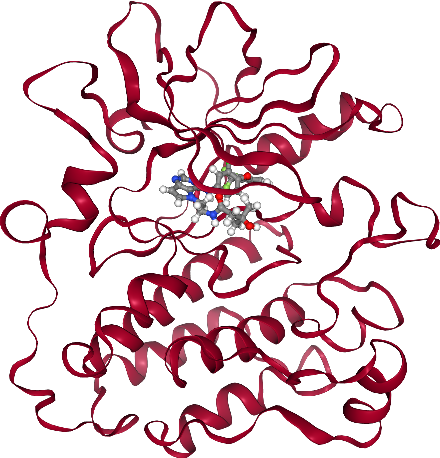

In [ ]:
view._display_image()

### 结构比对 (Alignment)

尽管在这个相对较短的轨迹可视化中几乎不可察觉，但根据使用的模拟软件包/设置，蛋白质在模拟过程中可能会发生旋转和平移。这会使轨迹的视觉检查变得复杂，通常需要在分析前进行比对 (alignment) 作为预处理步骤。常用的比对选择是蛋白质本身。这样，蛋白质不会偏离中心也不会旋转，从而可以观察解离事件 (unbinding events) 或构象变化 (conformational changes)。

[MDAnalysis](https://docs.mdanalysis.org/stable/index.html) 框架允许使用字符串轻松地对原子选择 (atom selection) 进行比对，并内置了简单的选择关键词，例如"protein"，它选择通常属于蛋白质的所有残基 (residues)。

在下一步中，我们将把轨迹中的结构（移动部分）与参考结构 (reference structure) 进行比对。参考结构中当前活动的帧将用于比对。


In [ ]:
# Set trajectory pointer to first frame as reference
md_universe.trajectory[0]

# in_memory=True is needed to actually modify the loaded trajectory
# if the trajectory is too big for memory, one can write out the aligned trajectory and reload it into a new universe
alignment = align.AlignTraj(
    mobile=md_universe, reference=md_universe, select="protein", in_memory=True
)
alignment.run()

In [ ]:
view = nv.show_mdanalysis(md_universe)
view

NGLWidget(max_frame=99)

In [ ]:
view.render_image(trim=True, factor=2, transparent=True);

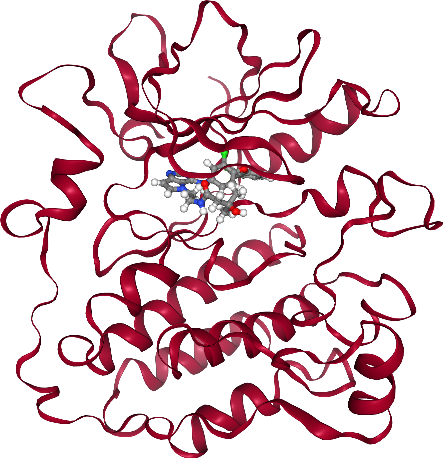

In [ ]:
view._display_image()

### 蛋白质和配体的均方根偏差 (RMSD of protein and ligand)

在动画中可以清楚地区分蛋白质 (protein) 和配体 (ligand)。然而，很难估计配体或蛋白质是否实际上显著改变了它们的位置/构象 (position/conformation)。因此，我们将使用更复杂的方法——计算均方根偏差 (Root-Mean-Square Deviation, RMSD) 来评估相对运动。我们将重点关注系统的不同部分（骨架 (backbone)、蛋白质和配体）。配体最好通过其独特的残基名称 (residue name) 来选择。在本例中，我们知道它是抑制剂 `03P`，但我们也可以通过检查拓扑结构文件 (topology file) 或将光标悬停在动画中的配体原子 (ligand atom) 上来找到这个名称。


In [ ]:
ligand_name = "03P"

#### 随时间变化的均方根偏差 (RMSD over time)

为了绘制均方根偏差 (Root-Mean-Square Deviation, RMSD) 曲线，我们编写了一个函数，该函数对从"宇宙" (universe) 中选择的原子组 (atom groups) 进行RMSD计算，并返回一个pandas的`Dataframe`对象。


In [ ]:
def rmsd_for_atomgroups(universe, selection1, selection2=None):
    """Calulate the RMSD for selected atom groups.

    Parameters
    ----------
    universe: MDAnalysis.core.universe.Universe
        MDAnalysis universe.
    selection1: str
        Selection string for main atom group, also used during alignment.
    selection2: list of str, optional
        Selection strings for additional atom groups.

    Returns
    -------
    rmsd_df: pandas.core.frame.DataFrame
        DataFrame containing RMSD of the selected atom groups over time.
    """

    universe.trajectory[0]
    ref = universe
    rmsd_analysis = rms.RMSD(universe, ref, select=selection1, groupselections=selection2)
    rmsd_analysis.run()
    columns = [selection1, *selection2] if selection2 else [selection1]
    rmsd_df = pd.DataFrame(np.round(rmsd_analysis.results.rmsd[:, 2:], 2), columns=columns)
    rmsd_df.index.name = "frame"
    return rmsd_df

#### 随时间变化的均方根偏差 (RMSD over time)

为了绘制均方根偏差 (Root-Mean-Square Deviation, RMSD) 曲线，我们编写了一个函数，该函数对从"宇宙" (universe) 中选择的原子组 (atom groups) 进行RMSD计算，并返回一个pandas的`Dataframe`对象。

运行该函数计算模拟过程中选定分子的RMSD：
- 整个蛋白质 (whole protein)
- 蛋白质骨架原子 (protein backbone atoms) 
- 配体 (ligand)

在计算过程中，分子将根据蛋白质骨架 (backbone) 叠加到第一帧（参考帧，reference frame）。


In [ ]:
rmsd = rmsd_for_atomgroups(md_universe, "backbone", ["protein", f"resname {ligand_name}"])
rmsd.head()

,backbone,protein,resname 03P
frame,,,
0,0.00,0.00,0.00
1,0.83,1.12,1.72
2,0.96,1.28,1.62
3,0.99,1.36,1.57
4,1.03,1.44,1.51


然后，我们绘制结果图。

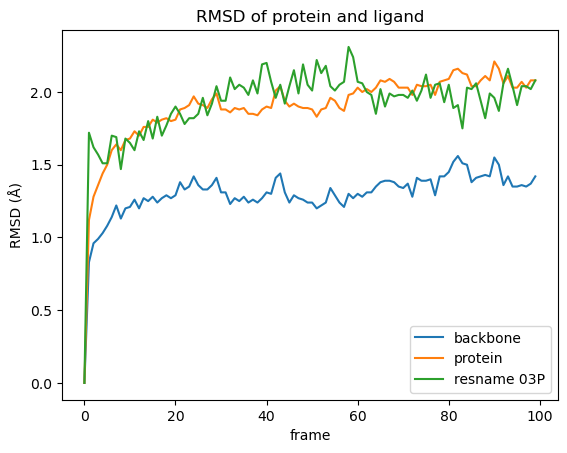

In [ ]:
rmsd.plot(title="RMSD of protein and ligand")
plt.ylabel("RMSD (Å)");

从图中我们可以观察到：

- 模拟过程中蛋白质骨架 (backbone) 仅发生轻微的构象变化 (conformational changes)，这并不意外，因为蛋白质是基于骨架进行叠加的。
- 与仅考虑蛋白质骨架相比，在RMSD计算中加入蛋白质侧链 (protein side chains) 会导致更大的运动幅度。
- 在我们的模拟中，配体 (ligand) 的运动范围与蛋白质侧链相当。然而，情况并非总是如此，因为配体可以更自由地移动，除了构象变化外，还可能涉及方向性运动 (directional movement)。当配体的RMSD值异常高时，很可能就是这种情况。

#### 帧间均方根偏差(RMSD, Root Mean Square Deviation)

前图展示了各时间点相对于初始状态的构象距离。
现在，我们计算所有帧之间的两两差异，并通过热图(heatmap)进行可视化展示。

In [ ]:
def RMSD_dist_frames(universe, selection):
    """Calculate the RMSD between all frames in a matrix.

    Parameters
    ----------
    universe: MDAnalysis.core.universe.Universe
        MDAnalysis universe.
    selection: str
        Selection string for the atomgroup to be investigated, also used during alignment.

    Returns
    -------
    array: np.ndarray
        Numpy array of RMSD values.
    """
    pairwise_rmsd = diffusionmap.DistanceMatrix(universe, select=selection)
    pairwise_rmsd.run()
    return pairwise_rmsd.results.dist_matrix


首先，我们使用上述函数分别计算蛋白质(protein)和配体(ligand)的距离矩阵(distance matrices)。
然后，我们将它们并排绘制为热图。

In [ ]:
dist_matrix_protein = RMSD_dist_frames(md_universe, "protein")
dist_matrix_ligand = RMSD_dist_frames(md_universe, f"resname {ligand_name}")

为了获得可比的热图结果，关键是将两图的色标最小值(minima)和最大值(maxima)设置为相同数值。
我们将最小值设为0，并从距离矩阵中推导出上限值(upper bound)。

In [ ]:
# get maximal distance between all frames
max_dist = max(np.amax(dist_matrix_ligand), np.amax(dist_matrix_protein))

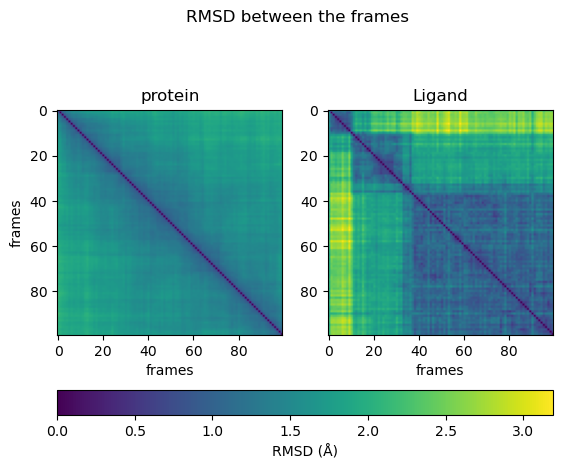

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.suptitle("RMSD between the frames")

# protein image
img1 = ax[0].imshow(dist_matrix_protein, cmap="viridis", vmin=0, vmax=max_dist)
ax[0].title.set_text("protein")
ax[0].set_xlabel("frames")
ax[0].set_ylabel("frames")

# ligand image
img2 = ax[1].imshow(dist_matrix_ligand, cmap="viridis", vmin=0, vmax=max_dist)
ax[1].title.set_text("Ligand")
ax[1].set_xlabel("frames")

fig.colorbar(img1, ax=ax, orientation="horizontal", fraction=0.1, label="RMSD (Å)");

从热图(heatmap)分析可以得出结论：蛋白质(protein)在不同状态(state)之间持续且均匀地运动，而配体(ligand)则在不同状态间存在"跳跃"(jump)式转变。有时配体能够反复达到相似的构象(conformations)。

### 相互作用分析(Interaction analysis)

现在我们将分析蛋白质(protein)与配体(ligand)间的相互作用。让我们再次可视化该系统，特别展示结合口袋(binding pocket)的更多细节。配体周围5埃(Å)半径范围内的所有残基(residues)都将显示其原子(atoms)和键(bonds)结构。


In [ ]:
# select pocket residues
pocket_resids = set(
    md_universe.select_atoms(f"(around 5 resname {ligand_name}) and protein").resids
)
view2 = nv.show_mdanalysis(md_universe)
view2.add_representation(
    "licorice", selection=f"protein and ({' '.join([str(x) for x in pocket_resids])})"
)
view2.center(selection="ligand")
view2

NGLWidget(max_frame=99)

In [ ]:
view2.render_image(trim=True, factor=2, transparent=True);

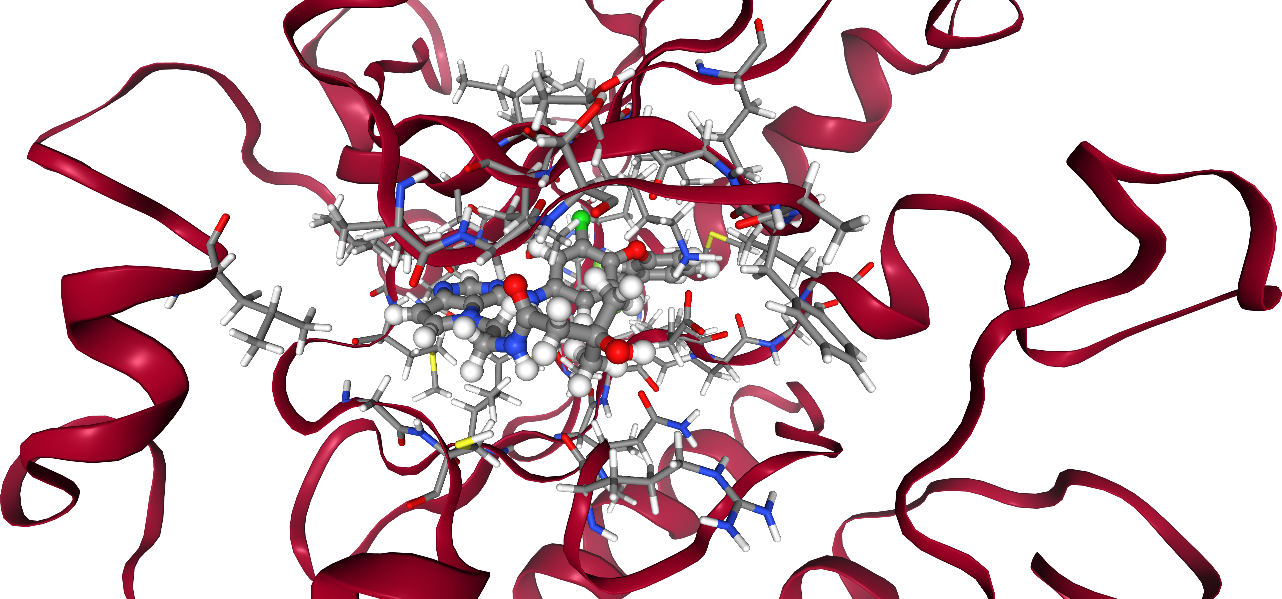

In [ ]:
view2._display_image()

#### 原子距离(Atomic distances)

现在我们将放大观察可能对当前项目有意义的相互作用。在本例中，我们关注甲硫氨酸793(methionine 793)的骨架氮原子(backbone nitrogen)与配体(ligand)芳香环(aromatic ring)的近距离接触。理论上，只要每组包含相同数量的原子，就可以计算原子组之间的距离，但这里我们关注单原子间的距离。

In [ ]:
protein_residue_id = "793"
protein_atom_name = "N"
ligand_id = "1"
ligand_atom_name = "N4"

单原子选择可以通过残基ID(residue id)和该残基内的原子名称(atom name)明确指定。由于残基名称(residue names)不唯一，因此不使用它们作为选择标准。在上方的详细视图中悬停所选原子，可以查看原子名称(atom names)及其对应的残基ID(residue id)。

In [ ]:
atomgroup_protein = md_universe.select_atoms(
    f"resid {protein_residue_id} and name {protein_atom_name}"
)
atomgroup_ligand = md_universe.select_atoms(f"resname {ligand_name} and name {ligand_atom_name}")


我们选择用于分析的原子组，本例中每组只包含一个原子。现在，我们可以计算当前帧中这些原子间的距离(使用MDAnalysis的`dist`函数)。该函数返回一个数组的数组：前两个元素是残基ID，但我们只关注第三个元素，即距离值。

In [ ]:
distance = dist(atomgroup_protein, atomgroup_ligand)
print(
    f"The distance between residues {protein_residue_id} and {ligand_id} is {distance[2][0]:.2f} Å"
)

The distance between residues 793 and 1 is 3.52 Å


3.5Å的距离足够近，可能在配体结合过程中起重要作用，值得深入研究。我们测量的配体与甲硫氨酸793骨架氮原子间的相互作用，实际上是许多激酶(kinases)中与铰链区(hinge region)形成的典型键合。

为了获取更多信息，我们需要观察这个距离随时间的变化。我们可以遍历各帧并计算每帧的距离。轨迹(trajectory)属性作为指针，只包含一个时间步长的信息。指针沿轨迹文件移动时，所有选择会自动更新。


In [ ]:
distances = []
for _ in md_universe.trajectory:
    distance = dist(atomgroup_protein, atomgroup_ligand)
    distances.append(distance[2][0])

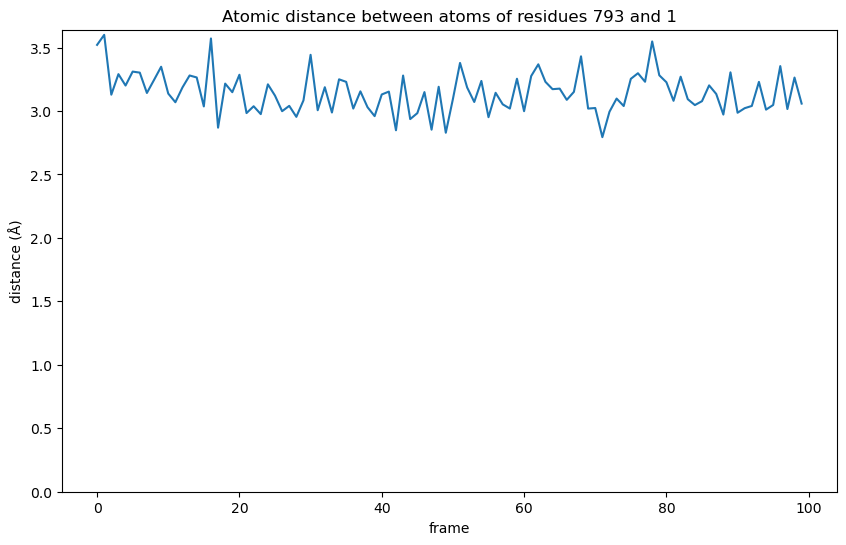

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.gca().set_ylim(bottom=0)
plt.ylabel("distance (Å)")
plt.xlabel("frame")
plt.title(f"Atomic distance between atoms of residues {protein_residue_id} and {ligand_id}")
plt.show()


从图中可以看出，在相互作用过程中，距离比第一帧观察到的3.52Å更短。这意味着相互作用最初增强，虽然存在波动，但在较长时间内保持相对稳定。

#### 氢键分析(Hydrogen bond analysis)

我们正在分析的铰链区(hinge region)相互作用实际上形成了一个氢键(hydrogen bond)。甲硫氨酸(methionine)骨架中的氮原子作为供体(donor)，配体(ligand)芳香环中的氮原子作为受体(acceptor)。

我们回到可视化界面获取形成该氢键的氢原子(hydrogen)的唯一名称。然后，可以使用[MDAnalysis](https://docs.mdanalysis.org/1.0.0/documentation_pages/analysis/hydrogenbonds.html)的氢键分析功能来确定氢键的特征距离和角度。氢键分析会自动覆盖所有帧，无需手动迭代，便于绘图。

In [ ]:
hydrogen_name = "H"

In [ ]:
def run_hydrogenbond_analysis(
    universe,
    donor_resid,
    donor_atom,
    hydrogen_atom,
    acceptor_resid,
    acceptor_atom,
    h_cutoff=1.2,
    a_cutoff=3.0,
    angle_cutoff=120,
):
    """
    Perform an hydrogen bond analysis between selcted atom groups.
    Return the data as readable, formatted data frame.

    Parameters
    ----------
    universe: MDAnalysis.core.universe.Universe
        MDAnalysis universe.
    donor_resid: str
        Residue Id of residue containing donor atom in MDAnalysis universe.
    donor_atom: str
        Name of the donor atom in the MDAnalysis universe.
    hydrogen_atom: str
        Name of involved hydrogen atom in the MDAnalysis universe.
    acceptor_resid: str
        Residue Id of residue containing acceptor atom in the MDAnalysis universe.
    acceptor_atom: str
        Name of the acceptor atom in the MDAnalysis universe.
    h_cutoff: float, optional
        Distance cutoff used for finding donor-hydrogen pairs.
    a_cutoff: float, optional
        Donor-acceptor distance cutoff for hydrogen bonds.
    angle_cutoff: int, optional
        D-H-A angle cutoff for hydrogen bonds.

    Returns
    -------
    bond : pandas.core.frame.DataFrame
        DataFrame containing hydrogen bond information over time.
    """

    # set up and run the hydrogen bond analysis (HBA)
    hbonds = HBA(
        universe=universe,
        donors_sel="resid " + donor_resid + " and name " + donor_atom,
        hydrogens_sel="resid " + donor_resid + " and name " + hydrogen_atom,
        acceptors_sel="resid " + acceptor_resid + " and name " + acceptor_atom,
        d_h_cutoff=h_cutoff,
        d_a_cutoff=a_cutoff,
        d_h_a_angle_cutoff=angle_cutoff,
    )
    hbonds.run()
    # extract bond data
    bond = pd.DataFrame(np.round(hbonds.results.hbonds, 2))
    # name columns (according to MDAnalysis function description)
    bond.columns = [
        "frame",
        "donor_index",
        "hydrogen_index",
        "acceptor_index",
        "distance",
        "angle",
    ]
    # set frame as the index
    bond["frame"] = bond["frame"].astype(int)
    bond.set_index("frame", inplace=True, drop=True)
    return bond


我们使用自定义函数运行氢键分析，该函数会返回一个数据框(data frame)。

In [ ]:
bond = run_hydrogenbond_analysis(
    md_universe, protein_residue_id, protein_atom_name, hydrogen_name, ligand_id, ligand_atom_name
)
bond.head()

,donor_index,hydrogen_index,acceptor_index,distance,angle
frame,,,,,
17,1483.0,1484.0,5529.0,2.87,144.73
21,1483.0,1484.0,5529.0,2.98,162.87
23,1483.0,1484.0,5529.0,2.98,173.41
26,1483.0,1484.0,5529.0,3.00,175.31
28,1483.0,1484.0,5529.0,2.95,163.73


从表中可以看出，该氢键仅在模拟过程中的某些帧被识别。

使用的模块采用严格的预设条件搜索氢键。默认设置下，只有当供体(donor)与受体(acceptor)距离小于3Å、供体与氢原子距离小于1.2Å且角度大于120°时(见图1)，才会检测到氢键。不满足这些条件的帧将不会包含该氢键。

为了在整个模拟过程中追踪该氢键，我们可以调整这些阈值以检测"较弱"状态下的氢键。从上表可以看出，角度值普遍较高，而距离值更接近3Å的截止距离。因此，我们尝试将供体与受体的距离截止值提高到5Å后重新进行分析。


In [ ]:
bond = run_hydrogenbond_analysis(
    md_universe,
    protein_residue_id,
    protein_atom_name,
    hydrogen_name,
    ligand_id,
    ligand_atom_name,
    a_cutoff=5.0,
)
bond.head()

,donor_index,hydrogen_index,acceptor_index,distance,angle
frame,,,,,
0,1483.0,1484.0,5529.0,3.52,166.39
1,1483.0,1484.0,5529.0,3.60,145.63
2,1483.0,1484.0,5529.0,3.13,173.95
3,1483.0,1484.0,5529.0,3.29,151.99
4,1483.0,1484.0,5529.0,3.20,170.21


现在我们为`bond`作图

In [ ]:
def plot_hydrogen_bond_over_time(bond):
    """
    Plot the distance and degree of a chosen hydrogen bond over time.
    Peaks in angle and dips in distance represent moments of strong binding.

    Parameters
    ----------
    bond: pandas.core.frame.DataFrame
        Hydrogen bond analysis data frame with named columns.
    """

    donor_index = bond.iloc[0].donor_index
    acceptor_index = bond.iloc[0].acceptor_index

    # add values for missing frames for gapless plotting
    bond = bond.reindex(np.arange(0, 99))

    # plot the data
    fig = plt.figure(figsize=(10, 6))
    distance = bond.distance.plot(
        title=f"H-Bond between donor {donor_index} and acceptor {acceptor_index}",
        style="o-",
        x="frame",
    )
    distance.set_ylabel("distance (Å)")
    distance.set_xlabel("frame")
    distance.set_ylim(bottom=0)
    angle = bond.angle.plot(secondary_y=True, style="o-", x="frame")
    angle.set_ylabel("angle (°)")
    angle.set_xlabel("frame")
    angle.set_ylim(bottom=0)
    fig.legend(loc="lower right", bbox_to_anchor=(1, 0), bbox_transform=distance.transAxes)
    plt.show()

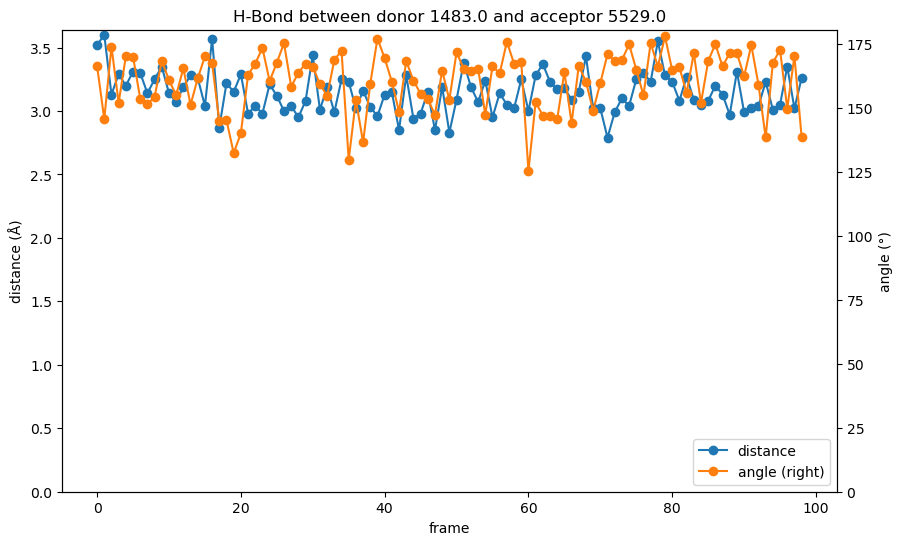

In [ ]:
plot_hydrogen_bond_over_time(bond)

虽然氢键分析中的距离值与前述纯距离图中观察到的相同，但结合键角(bond angle)信息使分析更加全面。如前所述，在整个模拟过程中，该距离处于氢键长度的上限，但键角始终接近180°，这稳定了氢键的形成。通过分析我们可以推测，激酶(kinase)铰链区中甲硫氨酸骨架的相互作用确实是配体结合的关键因素。

In [ ]:
view_strong = nv.show_mdanalysis(md_universe)
view_strong.add_representation("ball+stick", selection=f"protein and {protein_residue_id}")
view_strong.center(selection="ligand")
view_strong.frame = 71
view_strong

NGLWidget(frame=71, max_frame=99)

In [ ]:
view_bad = nv.show_mdanalysis(md_universe)
view_bad.add_representation("ball+stick", selection=f"protein and {protein_residue_id}")
view_bad.center(selection="ligand")
view_bad.frame = 1
view_bad

NGLWidget(frame=1, max_frame=99)

## 讨论

分子动力学(Molecular Dynamics, MD)模拟有多种分析方法。在本教程中，我们仅探讨了部分可用方法，旨在为用户提供初步认识。其中一些方法较为直观，如系统可视化或均方根偏差(Root Mean Square Deviation, RMSD)计算，而其他方法则需要更精细的操作。特别是氢键(hydrogen bond)分析目前仍需手动输入和调整参数。但随着该领域的进一步发展，我们预期这些分析框架将变得更加完善。

用于分析的MD模拟时间实际上过短，无法为蛋白质或配体的结合(binding)/解离(unbinding)事件甚至构象变化(conformational changes)提供统计学显著数据。要充分发挥MD模拟的潜力，需要使用高性能计算集群(high performance clusters)。关于MD模拟研究取得的突破性进展，可以参考[Folding@home](https://foldingathome.org/)联盟的网页，该联盟通过连接全球计算机资源来解决紧迫的科学挑战。


## 测验

- 您认为以下哪个氢键(hydrogen bond)最强？
  - A: 供体(donor)-受体(acceptor)距离 = 3.5 Å，供体-氢-受体角度 = 180°
  - B: 供体-受体距离 = 2.7 Å，供体-氢-受体角度 = 170°
  - C: 供体-受体距离 = 3.2 Å，供体-氢-受体角度 = 150°
- 尝试将轨迹(trajectory)对齐配体(ligand)。这会对均方根偏差(Root Mean Square Deviation, RMSD)图产生什么影响？
- 选择第二对原子并分析它们的相互作用(interactions)。
- 您能否实现一个函数来计算蛋白质残基(residues)的均方根波动(Root Mean Square Fluctuation, RMSF)？
